In [ ]:
                            HR Analytics Project -Understanding the attrition in HR
Project Overview:             
The HR Analytics project you are undertaking focuses on understanding employee attrition—analyzing why employees leave 
companies and how organizations can mitigate this. HR analytics can assist in gathering insights to reduce employee turnover, 
improve retention, and boost overall employee performance.

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

D:\workdata\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       380
           1       0.14      0.03      0.05        61

    accuracy                           0.84       441
   macro avg       0.50      0.50      0.48       441
weighted avg       0.76      0.84      0.79       441

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.75      0.10      0.17        61

    accuracy                           0.87       441
   macro avg       0.81      0.55      0.55       441
weighted avg       0.86      0.87      0.83       441



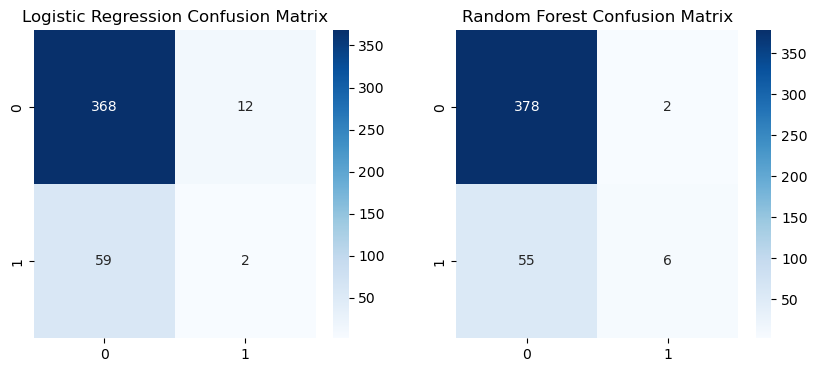

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
url = 'https://raw.githubusercontent.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics/master/ibm-hr-analytics-employee-attrition-performance.zip'
data = pd.read_csv(url)

# Data exploration
print(data.head())  # Preview data
print(data.info())  # Check for missing values and data types
print(data.describe())  # Statistical summary

# Check for missing values
print(data.isnull().sum())

# Data Preprocessing
# Convert categorical columns into numerical values
# Label encode 'Attrition' (Target variable) into 0 and 1
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])  # 0: No, 1: Yes

# One-Hot Encoding for other categorical features (e.g., Department, EducationField)
data = pd.get_dummies(data, drop_first=True)

# Feature Scaling
scaler = StandardScaler()
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Train-Test Split
X = data.drop(columns=['Attrition'])  # Features
y = data['Attrition']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Model Evaluation
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix for both models
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')

plt.show()


In [ ]:
Steps to Analyze HR Attrition:
Download and Explore the Dataset:

Download the dataset from the link provided.
Load and explore the data to understand its structure, features, and target variable (attrition).
Data Cleaning and Preprocessing:

Handle missing values.
Convert categorical features into numerical form using one-hot encoding or label encoding.
Feature scaling and normalization if needed.
Exploratory Data Analysis (EDA):

Analyze the features to understand the patterns related to employee attrition.
Visualize relationships between variables like age, salary, job role, department, and attrition.
Identify significant factors contributing to attrition.
Model Building:

Use machine learning models like logistic regression, decision trees, or random forests to predict employee attrition.
Train-test split and evaluate the model using appropriate metrics like accuracy, precision, recall, and F1-score.
Model Evaluation and Interpretation:

Evaluate the performance of the model.
Interpret important features influencing attrition.
